In [15]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [16]:
df = pd.read_csv('lending_clubFull_Data_Set.csv')

In [17]:
df.shape

(25000, 135)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 135 entries, Unnamed: 0 to settlement_term
dtypes: float64(100), int64(2), object(33)
memory usage: 25.7+ MB


In [19]:
columns_to_drop = [
    'Unnamed: 0','id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
    'sub_grade', 'emp_title', 'emp_length', 'verification_status', 'pymnt_plan', 'desc', 'purpose',
    'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_high', 'inq_last_6mths',
    'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'next_pymnt_d',
    'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
    'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code',
    'application_type', 'annual_inc_joint', 'dti_joint',
    'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
    'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
    'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
    'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
    'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
    'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
    'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
    'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
    'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
    'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
    'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
    'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high',
    'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
    'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',
    'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog',
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
    'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date',
    'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
    'hardship_loan_status', 'orig_projected_additional_accrued_interest',
    'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
    'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
    'settlement_amount', 'settlement_percentage', 'settlement_term'
]

df = df.drop(columns=columns_to_drop)


In [20]:
# Check missing values count and percent
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
dti,12,0.048
home_ownership,1,0.004
annual_inc,1,0.004
loan_status,1,0.004
fico_range_low,1,0.004


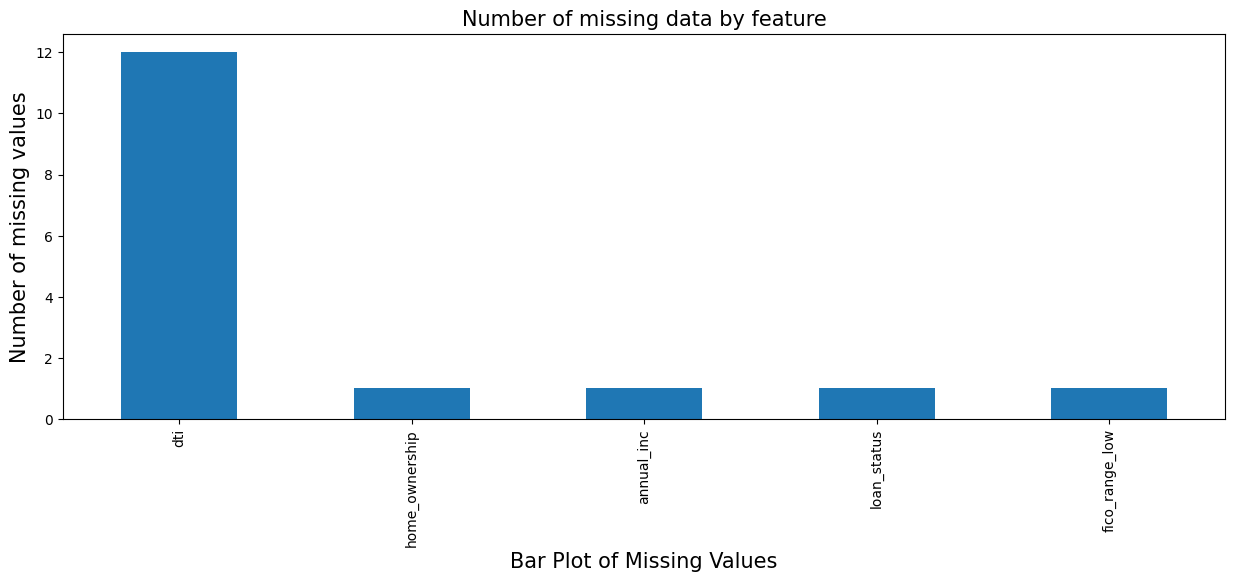

In [21]:
# Plot missing values
plt.figure(figsize=(15,5))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [22]:
df["dti"].value_counts(ascending=False).head()
df["dti"]= df["dti"].fillna(df["dti"].mode()[0])

In [25]:
df["loan_status"].value_counts()

1    21824
0     3176
Name: loan_status, dtype: int64

In [24]:
import numpy as np

# Assuming df is your DataFrame containing the loan data
df["loan_status"] = np.where(
    (df.loan_status == 'Fully Paid') |
    (df.loan_status == 'Current') |
    (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid') |
    (df.loan_status == 'Issued'),
    1, 0)


In [29]:
df.home_ownership.value_counts()

1    15031
0     9969
Name: home_ownership, dtype: int64

In [27]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
df.home_ownership.value_counts()

MORTGAGE    12359
RENT         9959
OWN          2672
OTHER           9
Name: home_ownership, dtype: int64

In [28]:
df["home_ownership"] = np.where((df.home_ownership == 'MORTGAGE') | (df.home_ownership == 'OWN'), 1, 0)

In [30]:
df.head(10)

,home_ownership,annual_inc,loan_status,dti,fico_range_low
0,1,44304.0,0,18.47,690.0
1,1,136000.0,1,20.63,670.0
2,0,50000.0,1,29.62,735.0
3,0,64400.0,1,16.68,675.0
4,1,88000.0,1,5.32,660.0
5,0,38500.0,0,33.73,660.0
6,0,40000.0,1,19.11,680.0
7,1,55000.0,1,32.40,775.0
8,1,118000.0,1,26.66,665.0
9,1,43000.0,1,20.68,725.0


<Axes: >

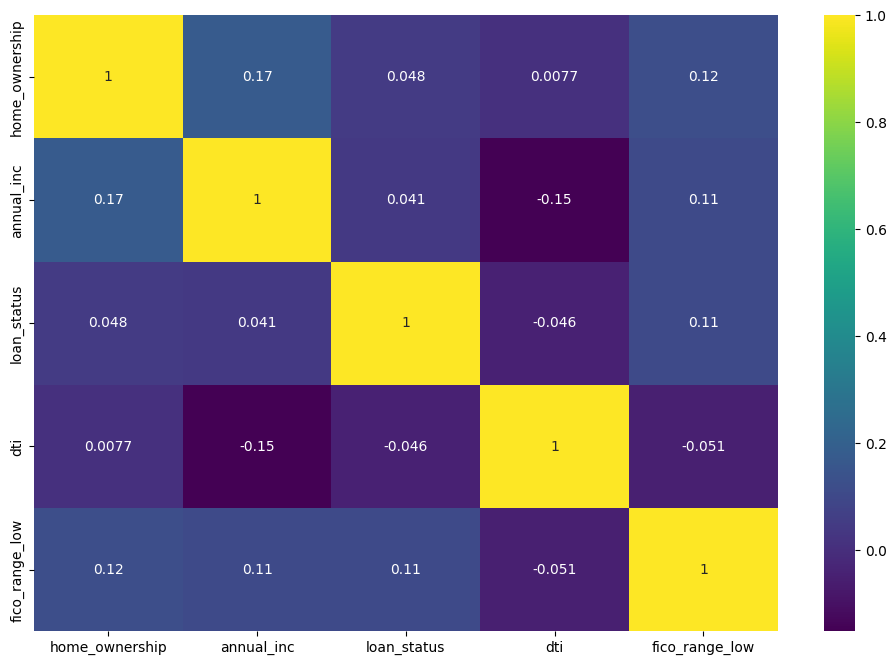

In [31]:
from seaborn.matrix import heatmap
correlation_m = df.corr()
correlation_m["loan_status"].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

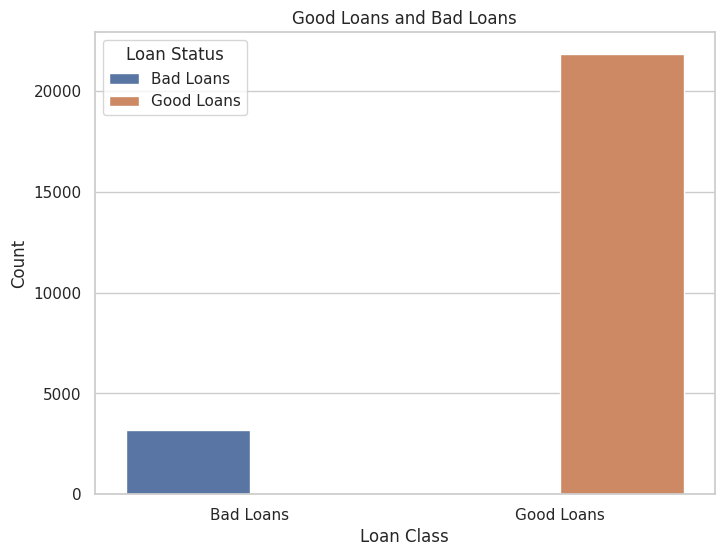

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="loan_status", hue="loan_status")
plt.title("Good Loans and Bad Loans")
plt.xlabel("Loan Class")
plt.ylabel("Count")
plt.legend(title="Loan Status", loc="upper left", labels=["Bad Loans", "Good Loans"])
plt.xticks(ticks=[0, 1], labels=["Bad Loans", "Good Loans"])
plt.show()


In [33]:
from sklearn.model_selection import train_test_split

df_train, df_temp, df_train, df_temp = train_test_split(df, df, test_size=0.431, random_state=44)
df_test, df_val, df_test, df_val = train_test_split(df_temp, df_temp, test_size=0.576, random_state=44)

# Save train, test, and validation data as CSV files
df_train.to_csv("lendingclub_traindata.csv", index=False)
df_test.to_csv("lendingclub_testdata.csv", index=False)
df_val.to_csv("lendingclub_valdata.csv", index=False)

In [34]:
train = pd.read_csv('lendingclub_traindata.csv')
validation=pd.read_csv('lendingclub_valdata.csv')
test = pd.read_csv('lendingclub_testdata.csv')

# 1 = good, 0 = default

#give column names
cols = ['home_ownership', 'income', 'loan_status', 'dti', 'fico']

train.columns = validation.columns=test.columns = cols

print(train.head())
print("--------------------------------")
print (validation.head())
print("--------------------------------")
print(test.head())

   home_ownership   income  loan_status    dti   fico
0               1  75000.0            1  24.34  665.0
1               1  50000.0            1  10.73  670.0
2               0  50000.0            1  27.96  670.0
3               1  85000.0            1  18.82  675.0
4               1  15000.0            1  47.28  720.0
--------------------------------
   home_ownership    income  loan_status    dti   fico
0               1   38207.0            1  26.11  665.0
1               1  120000.0            1   9.47  735.0
2               1   96000.0            1  12.68  680.0
3               1  100000.0            1  12.83  675.0
4               1   65000.0            1  22.64  695.0
--------------------------------
   home_ownership   income  loan_status    dti   fico
0               0  50500.0            1  28.15  670.0
1               1  90522.0            1   7.82  690.0
2               0  15168.0            1  29.19  680.0
3               1  31400.0            0  32.68  675.0
4         

In [35]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status', 1)
X_val=validation.drop('loan_status', 1)
X_test = test.drop('loan_status', 1)

# Scale data using the mean and standard deviation of the training set.
# This is not necessary for the simple logistic regression we will do here
# but should be done if L1 or L2 regrularization is carried out
X_test=(X_test-X_train.mean())/X_train.std()
X_val=(X_val-X_train.mean())/X_train.std()
X_train=(X_train-X_train.mean())/X_train.std()

# store target column as y-variables
y_train = train['loan_status']
y_val=validation['loan_status']
y_test = test['loan_status']

#print first five instances for each data set

print(X_train.head())
print("--------------------------------")
print(X_val.head())
print("--------------------------------")
print(X_test.head())

print(X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape)
X_train.columns

   home_ownership    income       dti      fico
0        0.823421 -0.035422  0.360062 -0.978231
1        0.823421 -0.489624 -0.516157 -0.819267
2       -1.214360 -0.489624  0.593119 -0.819267
3        0.823421  0.146259  0.004681 -0.660304
4        0.823421 -1.125507  1.836950  0.770366
--------------------------------
   home_ownership    income       dti      fico
0        0.823421 -0.703880  0.474015 -0.978231
1        0.823421  0.782142 -0.597276  1.247256
2        0.823421  0.346108 -0.390615 -0.501341
3        0.823421  0.418781 -0.380958 -0.660304
4        0.823421 -0.217103  0.250615 -0.024451
--------------------------------
   home_ownership    income       dti      fico
0       -1.214360 -0.480540  0.605351 -0.819267
1        0.823421  0.246583 -0.703504 -0.183414
2       -1.214360 -1.122455  0.672307 -0.501341
3        0.823421 -0.827550  0.896995 -0.660304
4       -1.214360 -0.453288 -0.012058 -1.137194
(14225, 4) (14225,) (6207, 4) (6207,) (4568, 4) (4568,)


Index(['home_ownership', 'income', 'dti', 'fico'], dtype='object')

In [36]:
freq = y_train.value_counts()           # count frequency of different classes in training swet
freq/sum(freq)*100

1    87.325132
0    12.674868
Name: loan_status, dtype: float64

In [47]:
X_val_filled = X_val.fillna(0)
X_val = X_val_filled
X_val.isnull().sum()

home_ownership    0
income            0
dti               0
fico              0
dtype: int64

In [38]:
#Create an ionstance of logisticregression named lgstc_reg

lgstc_reg =  LogisticRegression(penalty="none",solver="newton-cg")

# Fit logististic regression to training set

lgstc_reg.fit(X_train, y_train)                                        # fit training data on logistic regression


print(lgstc_reg.intercept_, lgstc_reg.coef_)

[1.9863965] [[ 0.06518555  0.08340413 -0.07239799  0.36354334]]


In [39]:
# y_train_pred, y_val_pred, and y_test_pred are the predicted probabilities for the training set
# validation set and test set using the fitted logistic regression model

y_train_pred=lgstc_reg.predict_proba(X_train)
y_val_pred=lgstc_reg.predict_proba(X_val)
y_test_pred=lgstc_reg.predict_proba(X_test)

# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val=np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test=np.negative(np.sum(mle_vector_test)/len(y_test))

print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)                    # get percentage of above

cost function training set = 0.3728444028042898
cost function validation set = 0.3747154390605456
cost function test set = 0.3683866946923656


In [40]:
THRESHOLD = [.75, .80, .85]
# Create dataframe to store resultd
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD

j = 0

# Iterate over the 3 thresholds

for i in THRESHOLD:


    #lgstc_reg.fit(X_train, y_train)


    # If prob for test set > threshold predict 1
    preds = np.where(lgstc_reg.predict_proba(X_test)[:,1] > i, 1, 0)


    # create confusion matrix
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                   # confusion matrix (in percentage)

    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')

    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives

    results.iloc[j,1] = accuracy_score(y_test, preds)
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)


    j += 1

print('ALL METRICS')
print( results.T)



Confusion matrix for threshold = 0.75
[[8.73467601e+01 2.18914186e-02]
 [1.26313485e+01 0.00000000e+00]]
 
Confusion matrix for threshold = 0.8
[[87.06217163  0.30647986]
 [12.45621716  0.17513135]]
 
Confusion matrix for threshold = 0.85
[[62.8502627  24.51838879]
 [ 6.78633975  5.84500876]]
 
ALL METRICS
                       0         1         2
THRESHOLD           0.75       0.8      0.85
accuracy        0.873468  0.872373  0.686953
true pos rate   0.999749  0.996492  0.719369
true neg rate        0.0  0.013865  0.462738
false pos rate       1.0  0.986135  0.537262
precision       0.873659  0.874835  0.902546
f-score         0.932461  0.931709  0.800613


AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.6303053186828075


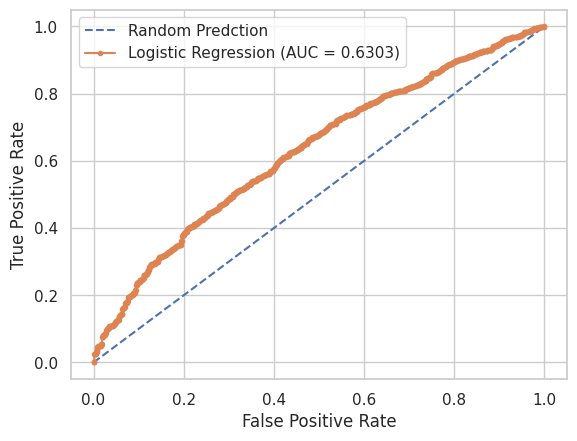

In [41]:
# Calculate the receiver operating curve and the AUC measure

lr_prob=lgstc_reg.predict_proba(X_test)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression (AUC = %0.4f)' % lr_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [42]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status',axis=1)
X_val=validation.drop('loan_status',axis=1)
X_test=test.drop('loan_status',axis=1)

# store target column
y_train = train['loan_status']
y_val=validation['loan_status']
y_test=test['loan_status']


print(X_train.shape, y_train.shape, X_val.shape,y_val.shape,X_test.shape,y_test.shape)

(14225, 4) (14225,) (6207, 4) (6207,) (4568, 4) (4568,)


In [43]:
X_train.columns

Index(['home_ownership', 'income', 'dti', 'fico'], dtype='object')

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score

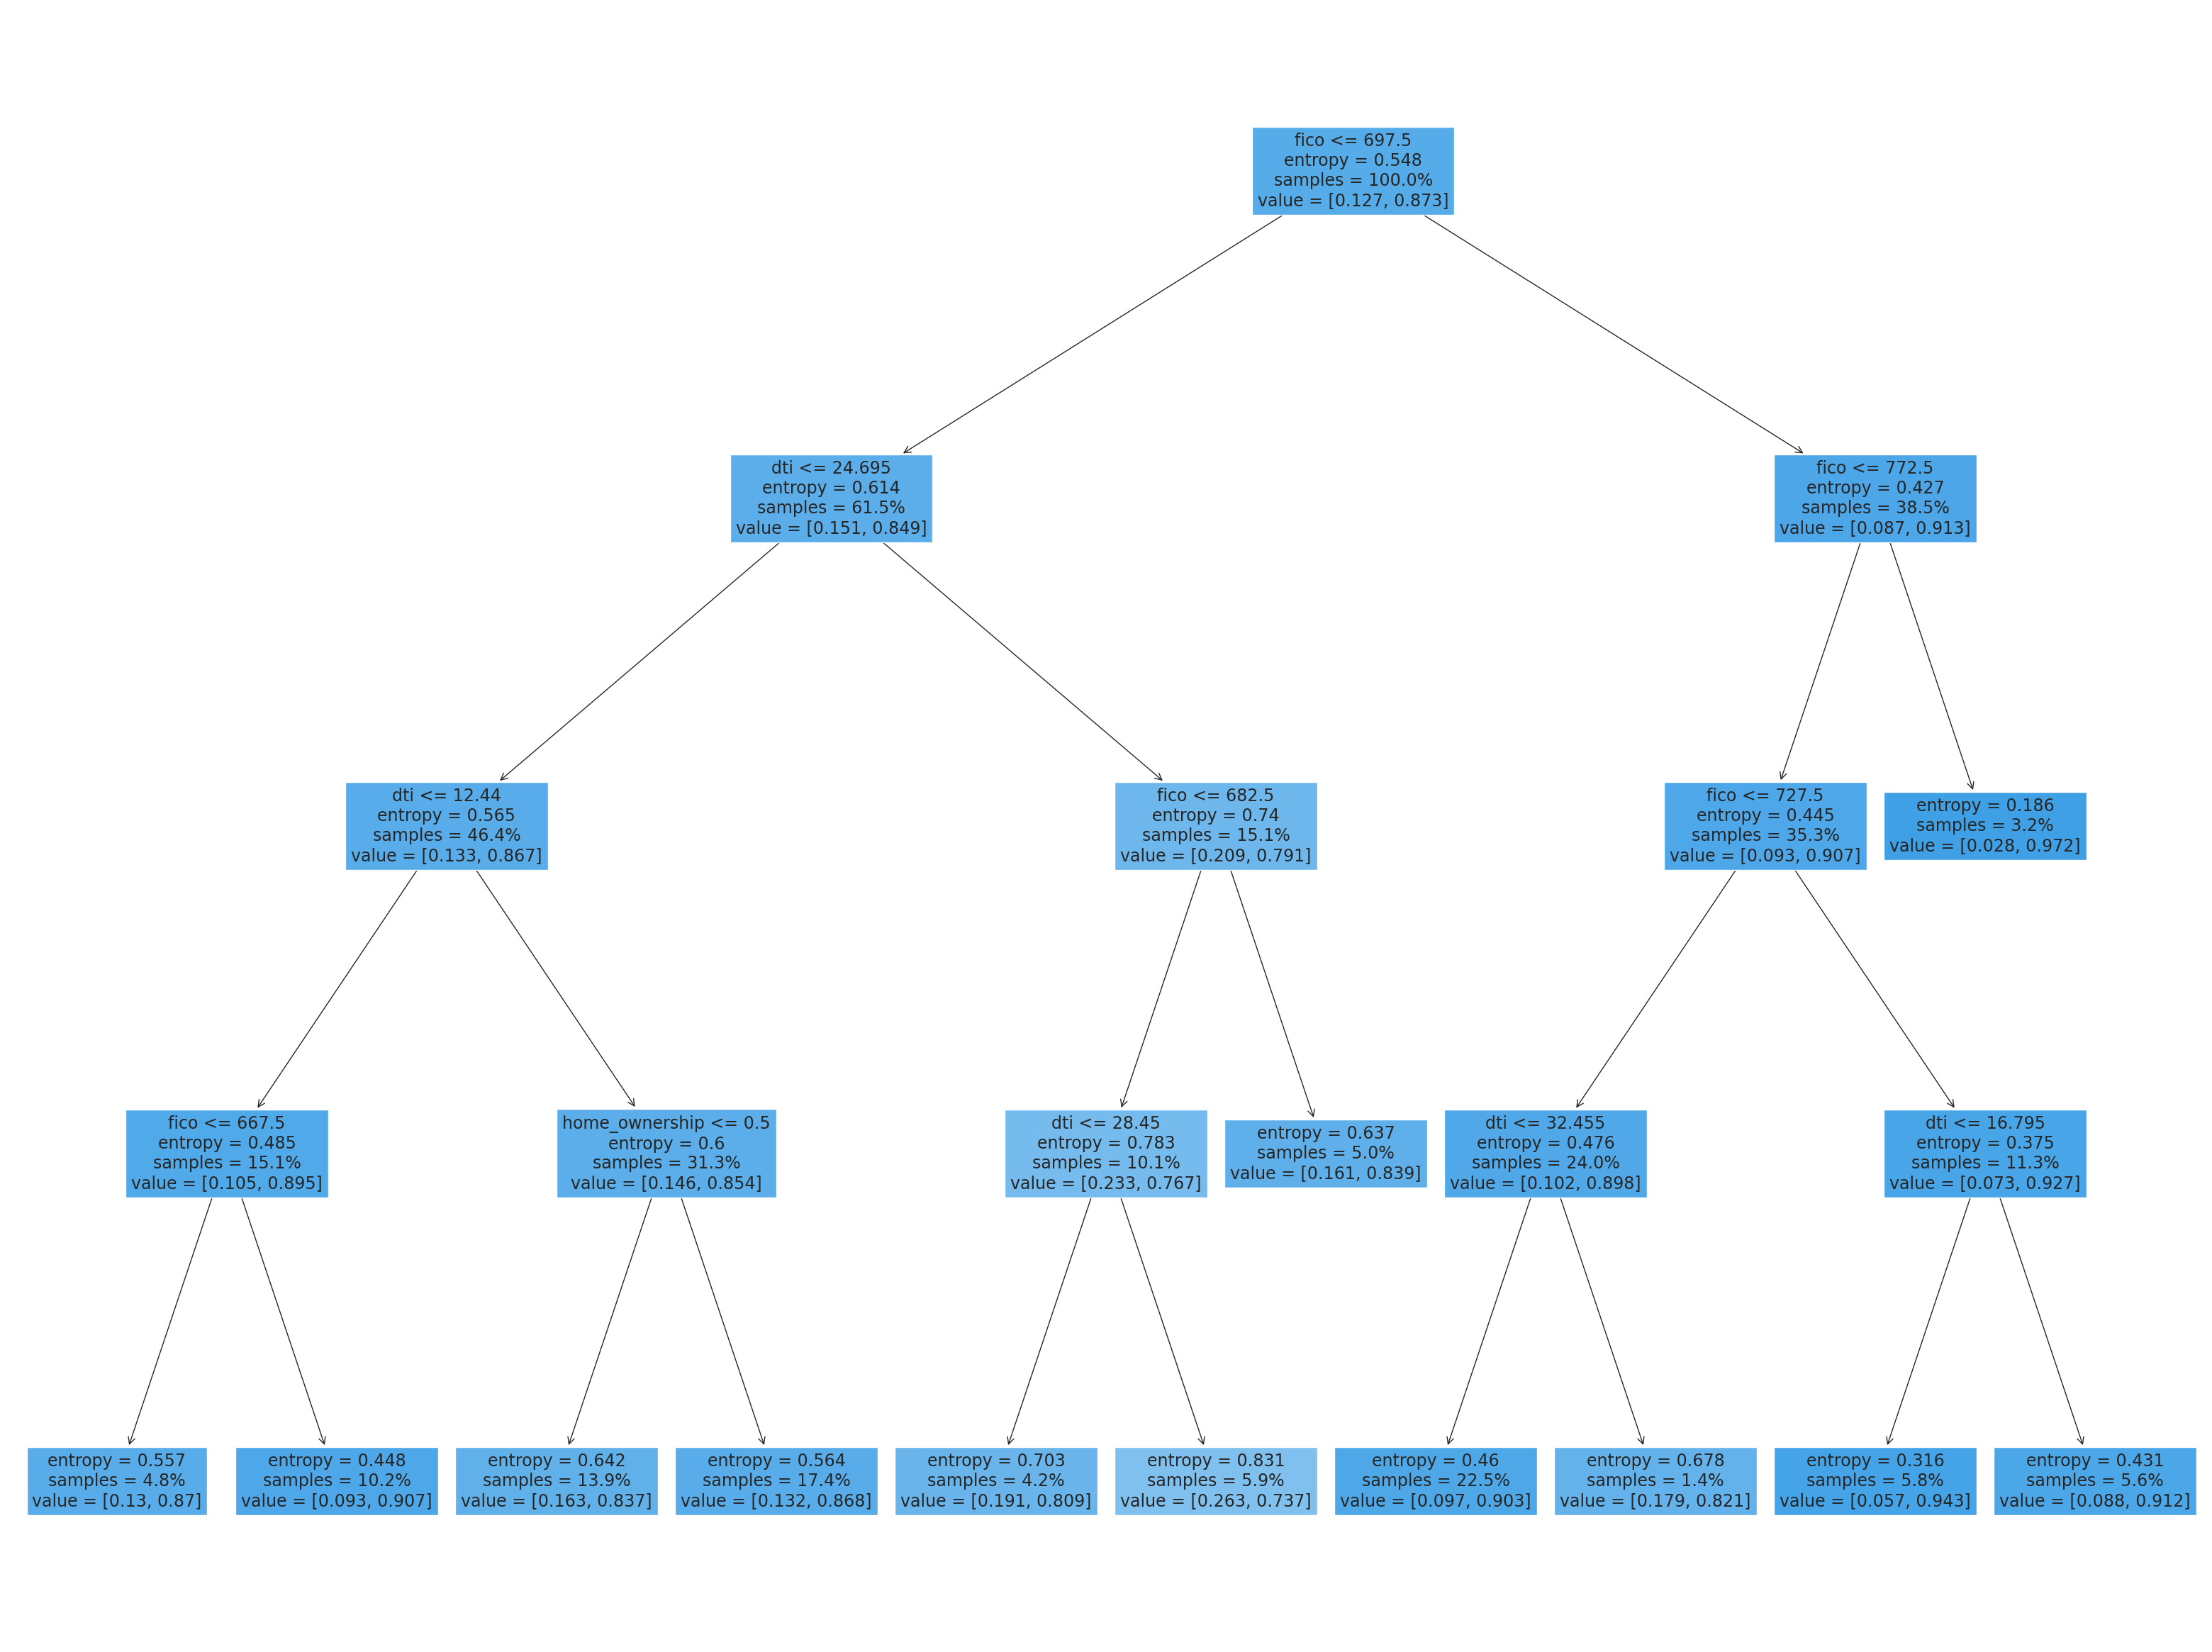

In [45]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=1000,min_samples_leaf=200,random_state=0)
clf = clf.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(clf, filled=True, feature_names=X_train.columns, proportion=True)
plt.show()

In [48]:
y_train_pred = clf.predict_proba(X_train)
y_val_pred=clf.predict_proba(X_val)
y_test_pred=clf.predict_proba(X_test)

print (y_train_pred)

# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val=np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test=np.negative(np.sum(mle_vector_test)/len(y_test))

print (y_train_pred)


print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)

[[0.13225806 0.86774194]
 [0.09334248 0.90665752]
 [0.19055649 0.80944351]
 ...
 [0.16320324 0.83679676]
 [0.09731753 0.90268247]
 [0.19055649 0.80944351]]
[[0.13225806 0.86774194]
 [0.09334248 0.90665752]
 [0.19055649 0.80944351]
 ...
 [0.16320324 0.83679676]
 [0.09731753 0.90268247]
 [0.19055649 0.80944351]]
cost function training set = 0.3688627621814208
cost function validation set = 0.37361011363890717
cost function test set = 0.36776929087709087


In [49]:
THRESHOLD = [.75, .80, .85]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
n_test = len(y_test)
Q = clf.predict_proba(X_test)[:,1]

j = 0
for i in THRESHOLD:                                                                                        # iterate over each threshold
                                                                         # fit data to model
    preds = np.where(Q>i, 1, 0)                                       # if prob > threshold, predict 1

    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None)/n_test)*100
    # confusion matrix (in percentage)

    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')

    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives

    results.iloc[j,1] = accuracy_score(y_test, preds)
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)

    j += 1

print('ALL METRICS')
print(results.T.to_string(header=False))

Confusion matrix for threshold = 0.75
[[83.69089317  3.67775832]
 [11.29597198  1.33537653]]
 
Confusion matrix for threshold = 0.8
[[83.69089317  3.67775832]
 [11.29597198  1.33537653]]
 
Confusion matrix for threshold = 0.85
[[63.7915937  23.57705779]
 [ 6.78633975  5.84500876]]
 
ALL METRICS
THRESHOLD           0.75       0.8      0.85
accuracy        0.850263  0.850263  0.696366
true pos rate   0.957905  0.957905  0.730143
true neg rate   0.105719  0.105719  0.462738
false pos rate  0.894281  0.894281  0.537262
precision       0.881079  0.881079  0.903846
f-score         0.917887  0.917887  0.807762


In [50]:
# Compute the ROC curve and AUC
fpd, tpd, _ = roc_curve(y_test, Q)
roc_auc1 = auc(fpd, tpd)

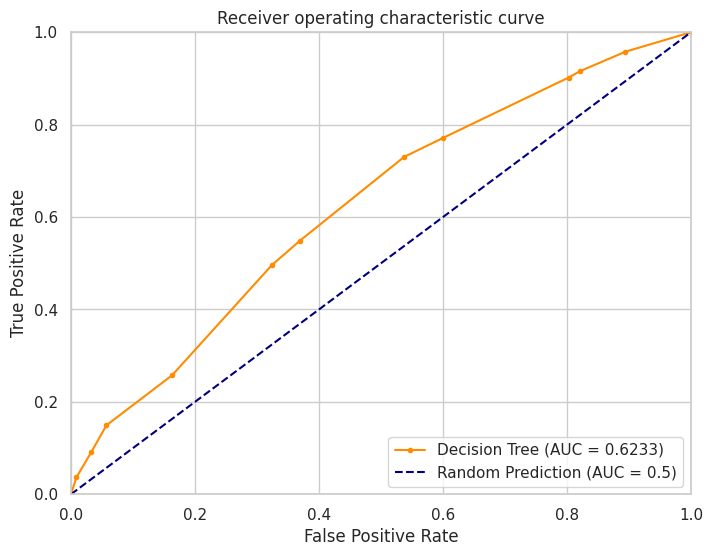

In [51]:
plt.figure(figsize=(8,6))      # format the plot size
lw = 1.5
plt.plot(fpd, tpd, color='darkorange', marker='.',
         lw=lw, label='Decision Tree (AUC = %0.4f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train the logistic regression model
lgstc_reg = LogisticRegression()
lgstc_reg.fit(X_train, y_train)

# Train the decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [53]:
ensemble_prob = (lgstc_reg.predict_proba(X_test)[:, 1] + clf.predict_proba(X_test)[:, 1]) / 2
from sklearn.metrics import roc_auc_score

ensemble_auc = roc_auc_score(y_test, ensemble_prob)
print("AUC of the ensemble model:", ensemble_auc)

AUC of the ensemble model: 0.6329364553781537


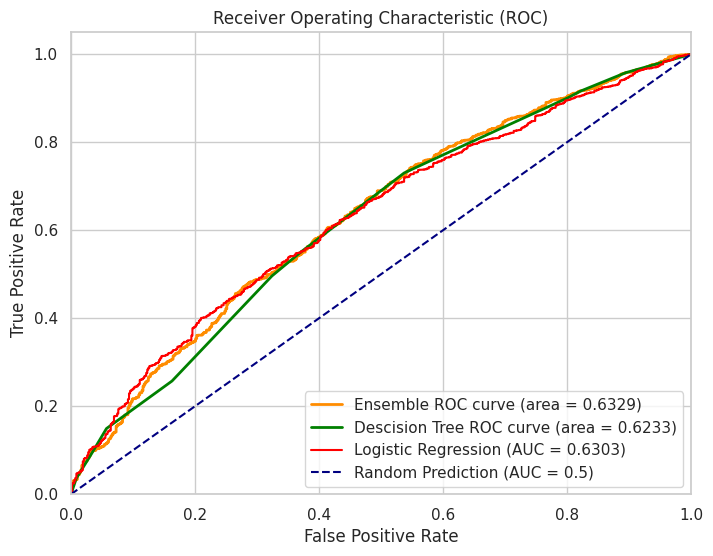

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ensemble probabilities
ensemble_prob = (lgstc_reg.predict_proba(X_test)[:, 1] + clf.predict_proba(X_test)[:, 1]) / 2

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for the ensemble model
fpr, tpr, _ = roc_curve(y_test, ensemble_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Ensemble ROC curve (area = %0.4f)' % roc_auc)
plt.plot(fpd, tpd, color='green', lw=2, label='Descision Tree ROC curve (area = %0.4f)' % roc_auc1)
plt.plot(lr_fpr,lr_tpr,color='red',label='Logistic Regression (AUC = %0.4f)' % lr_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
